<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/AAM_WCS__Classification_challenge_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

# Executez le code ci-dessous

In [1]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  MIN_TEMPERATURE_C  WINDSPEED_MAX_KMH  \
0  2018-01-01                 12                  8                 61   
1  2018-01-02                 13                  6                 26   
2  2018-01-03                 15                 10                 40   
3  2018-01-04                 14                 11                 45   
4  2018-01-05                 12                  7                 21   

   TEMPERATURE_MORNING_C  TEMPERATURE_NOON_C  TEMPERATURE_EVENING_C  \
0                      9                  11                      8   
1                      8                  12                     13   
2                     11                  12                     10   
3                     14                  14                     11   
4                     10                  11                      8   

   PRECIP_TOTAL_DAY_MM  HUMIDITY_MAX_PERCENT  VISIBILITY_AVG_KM  \
0                  8.9                    79              9.5

# Classification challenge

Your goal are :
- to merge both 2018 DataFrames
- to train-test split the new 2018 DataFrame
- to train 3 differents Machine Learning algorithms (KNN, logistic regression and decision tree) with "opinion" as target
- to try different parameters
- to find the best accuracy score (on the test set of course)
- to fill the missing values in the "opinion" columns whith your best model
- to explain what is the "rules" used by your model to predict the opinion.

You can help yourself with charts if you want.

# Défi de classification

Votre objectif est de :
- fusionner les deux DataFrames 2018
- Entraînement et test sur le nouveau DataFrame 2018
- entraîner 3 algorithmes d'apprentissage automatique différents (KNN, régression logistique et arbre de décision) avec "opinion" comme cible
- essayer différents paramètres
- trouver le meilleur score de précision (sur l'ensemble de test bien sûr)
- remplir les valeurs manquantes dans les colonnes "opinion" avec votre meilleur modèle
- expliquer quelles sont les "règles" utilisées par votre modèle pour prédire l'opinion.

Vous pouvez vous aider de graphiques si vous le souhaitez.

In [ ]:
# Your code here :
# Votre code ici :


## Le "Merge"/ La "Fusion"

In [2]:
df_main.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C'],
      dtype='object')

In [3]:
df_opinion.columns

Index(['date', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR',
       'OPINION'],
      dtype='object')

"DATE" ou "date" est la colonne commune:

In [4]:
# Fusionner les deux DataFrames 2018 "df_main" & "df_opinion"

# en effet, Nous pouvons renommer la colonne date en DATE dans"df_opinion" :
df_opinion = df_opinion.rename(columns = {'date':'DATE'})

# fusionner les deux DataFrames pour obtenir une nouvelle DataFrame "df2018" avec la colonne commune 'DATE'
df2018 = pd.merge(df_main, df_opinion, how='left', on= 'DATE')

df2018

# df2018 a 365 lignes et 20 colonnes 

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


## Le "train-test split"/ La "découpe du 'train' et du 'test'

## 1er type de Model: Regression Linéaire

In [27]:
# Un DF noté "df_clean" avec traitement(suppression) des NaN  sur les colonnes(axis=1)  

df_clean = df2018[~df2018.isnull().any(axis=1)]

# un DF noté "df_nan" contenant uniquement des lignes avec NaN dans la colonne Sunhour (les lignes que vous voulez remplir utérieurement).
df_nan = df2018[df2018.isnull().any(axis=1)]

print("(Nbr de lignes du 'df_clean', Nbr de colonnes du 'df_clean') :", df_clean.shape)
print(df_clean.info())
print("Informations sur le DF des Nan ", "\n", df_nan.info())
     

(Nbr de lignes du 'df_clean', Nbr de colonnes du 'df_clean') : (341, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    341 non-null    object 
 1   MAX_TEMPERATURE_C       341 non-null    int64  
 2   MIN_TEMPERATURE_C       341 non-null    int64  
 3   WINDSPEED_MAX_KMH       341 non-null    int64  
 4   TEMPERATURE_MORNING_C   341 non-null    int64  
 5   TEMPERATURE_NOON_C      341 non-null    int64  
 6   TEMPERATURE_EVENING_C   341 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     341 non-null    float64
 8   HUMIDITY_MAX_PERCENT    341 non-null    int64  
 9   VISIBILITY_AVG_KM       341 non-null    float64
 10  PRESSURE_MAX_MB         341 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  341 non-null    float64
 12  HEATINDEX_MAX_C         341 non-null    int64  
 13  DEWPOINT_MAX_C        

Maintenant, entraînez votre modèle **Regression Linéaire**

Pour cette partie, travaillons sur df_clean. 

Avec scikit-learn, trouvez le modèle de **régression linéaire multivariée** avec le meilleur score (n'oubliez pas d'entraîner-tester-séparer votre DataFrame "df_clean" avant !)

Nous essayons de prédire "SUNHOUR"/ l'HEURE DU SOLEIL, alors quelle est la meilleur variable explicative?

In [28]:
from sklearn.linear_model import LinearRegression

df = df_clean.loc[:, df_clean.columns != 'SUNHOUR']
X = df.loc[:, df.select_dtypes(exclude=['object']).columns.tolist()] # Exclure toute variable 'object'(ici= alphanumérique), toutes les variables numériques sont potentiellement explicatives
y = df_clean[['SUNHOUR']]


model = LinearRegression().fit(X, y)

print("Le 'score' de la régression linéaire est:", model.score(X,y))
print(" Le 'coefficient' de la régression linéaire est: ", model.coef_)
print("Le coeff d 'interception' de la régression linéaire est:", model.intercept_)
     

Le 'score' de la régression linéaire est: 0.7381273732150055
 Le 'coefficient' de la régression linéaire est:  [[-7.00646654e-01 -5.14647810e-01 -1.50536540e-02  4.18810014e-01
   2.23802210e-01  4.99770480e-01 -7.08219049e-02 -4.06811094e-02
  -4.65874828e-01 -8.39856792e-02 -8.36771470e-02  3.43356927e-02
   9.20487651e-02  1.03145887e-01 -4.51666552e-04  0.00000000e+00
   4.31032654e-02]]
Le coeff d 'interception' de la régression linéaire est: [105.62641433]


In [13]:
# Prediction grâce au 1er Model: Regression Linéaire :

X_train = df_clean.drop(columns=['DATE', 'SUNHOUR','OPINION', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX'])
y_train = df_clean['SUNHOUR']

LinearRegression().fit(X_train, y_train)


X_test = df_nan.drop(columns=['DATE', 'SUNHOUR','OPINION', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX'])
lireg = LinearRegression().fit(X_train, y_train)
y_test = lireg.predict(X_test)

value = y_test.tolist()
keys = df_nan.index
df = pd.Series(value, index=keys).to_dict()
df_nan['SUNHOUR'].fillna(df, inplace=True)
df_nan['SUNHOUR']

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


18      7.374450
31      8.184722
66      7.497337
100     9.690865
118     6.374707
143    14.063619
152    14.231525
163    12.871937
165    10.253658
175    15.617924
184    12.316241
191    14.324790
194    14.970551
197    12.682214
204    14.489800
220    11.515354
225    12.937171
234    11.110940
266    10.642837
317    10.482131
321    10.938673
325     7.723055
346     4.613348
349     7.309835
Name: SUNHOUR, dtype: float64

In [30]:
#import des bibliothèques:
from sklearn.model_selection import train_test_split

# Choix des variables X et y et des métriques de l'entraînement de la régression linéaire sont:
X = df_clean.iloc[:,:-4]
y = df_clean['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42)
print("La longueur de l'ensemble de données initial du RL est de :", len(X))
print("La longueur du dataset 'Train'(80% de la BDD initial) du RL est de :", len(X_train))
print("La longueur du dataset 'Test'(20% de la BDD initial) du RL est de  :", len(X_test))

La longueur de l'ensemble de données initial du RL est de : 341
La longueur du dataset 'Train'(80% de la BDD initial) du RL est de : 272
La longueur du dataset 'Test'(20% de la BDD initial) du RL est de  : 69


# Choix de la réprésentation adéquate: "nuages de points"/"scatterplot" 

car plusieurs valeurs prédites:

Concaténer les deux DataFrames dans un nouveau DataFrame "df2018complete", et dessiner un nuage de points avec la date en abscisse et les heures d'ensoleillement en ordonnée. Essayez d'ajouter un drapeau pour identifier les valeurs réelles et les valeurs prédites.

Vous devriez obtenir quelque chose comme cela. Bien sûr, ce n'est pas exactement le même graphique, parce que nous n'entraînons pas le même modèle, sur les mêmes colonnes, etc...

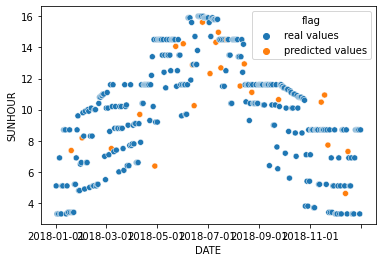

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_clean = df_clean.assign(flag='real values')
df_nan = df_nan.assign(flag='predicted values')
df2018complete = pd.concat([df_clean, df_nan]).sort_index()

sns.scatterplot(data = df2018complete, x= 'DATE', y= 'SUNHOUR', hue = 'flag')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# 2eme type de models: Modèles de classification: 
# KNN (Scikit-Learn)/ Régession Logistique(Mathplolib)/ Arbre de décision (Plot_tree)





In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Voir la base:
df2018complete

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,...,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,...,0.0,3.0,5.1,bad,real values
1,2018-01-02,13,6,26,8,...,0.0,3.0,3.3,bad,real values
2,2018-01-03,15,10,40,11,...,0.0,3.0,3.3,bad,real values
3,2018-01-04,14,11,45,14,...,0.0,3.0,3.3,bad,real values
4,2018-01-05,12,7,21,10,...,0.0,3.0,6.9,bad,real values
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,...,0.0,1.0,8.7,very bad,real values
361,2018-12-28,7,2,8,2,...,0.0,1.0,8.7,very bad,real values
362,2018-12-29,7,1,6,1,...,0.0,1.0,8.7,very bad,real values
363,2018-12-30,9,4,6,5,...,0.0,1.0,3.3,very bad,real values


In [33]:
# Traitement des Nan, car sans cela pas de "get-dummies"="speudo variables"(Méthode "factorize") possible:
# Sélectionner seulement les lignes sans NaN
df2018complete = df2018[df2018['OPINION'].notna()]

In [16]:
# On peut transformer par exmple la variable "OPINION" en valeurs numériques ("very bad";"bad";"not good not bad, good, very good")= (-1;0;1;2;4) par la méthode de factorisation:
df2018complete_fact_opinion  = df2018complete['OPINION'].factorize()[0]
df2018complete_fact_opinion

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,
        0, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  0,
        2,  2,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        0,  0,  1,  1,  1,  1,  0,  0,  2,  1,  2,  0,  0,  0,  0, -1,  0,
        2,  2,  2,  2,  3,  3,  3,  4,  4,  3,  2,  2,  2,  2,  0,  2, -1,
        0,  1,  0,  2,  2,  3,  3,  3,  2,  2,  2,  3,  0,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3, -1,  2,  2,  3,  3,  2,  0,  0,  2, -1,
        2,  0,  0,  0,  0,  4,  3,  3,  0,  2, -1,  0, -1,  2,  0,  0,  2,
        4,  3,  3,  3,  3, -1,  4,  4,  3,  4,  4,  3,  3,  2, -1,  2,  3,
        2,  4,  4,  3, -1,  3,  4, -1,  4,  3, -1,  3,  3,  3,  2,  3,  2,
       -1,  4,  4,  3,  2,  0,  0,  3,  3,  4,  3,  4,  4,  3,  3,  2, -1,
        2,  3,  2,  3, -1

In [34]:
# Modifer/afecter le nouveau DF crée avec factorize:
df2018complete['OPINION'] = df2018complete['OPINION'].factorize()[0]
df2018complete


<ipython-input-34-31d4e9654f6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018complete['OPINION'] = df2018complete['OPINION'].factorize()[0]


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,0
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,0
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,0
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,0
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,1
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,1
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,1
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,1


In [35]:
# liste des variables
df2018complete.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION'],
      dtype='object')

Régression Logistique:

In [40]:
# import des biliothèques de la Regression Logistique:
from sklearn.linear_model import LogisticRegression

# Intialisation du model LogisticReg
modelLR = LogisticRegression(max_iter=4600)

In [43]:
# Vérifications des itérations par limite fixé:
modelLR.n_iter_

array([4052], dtype=int32)

In [41]:
# Entrainement du model LogisticReg
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=4600)

In [42]:
# Afficher les scores du model LogisticReg 
y_train_pred = modelLR.predict(X_train)
y_test_pred = modelLR.predict(X_test)

print("score de précision (accuracy) sur l'ensemble d'entraînement :",modelLR.score(X_train, y_train))
print("score de précision (accuracy) sur l'ensemble de test :",modelLR.score(X_test, y_test))

score de précision (accuracy) sur l'ensemble d'entraînement : 0.9264705882352942
score de précision (accuracy) sur l'ensemble de test : 0.7246376811594203


In [44]:
# Vérification des classes
modelLR.classes_

array([0, 1, 2, 3, 4])

Arbre de décisions

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# import des bibliothèques d'Arbres de décision (Regression Trees) :
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


# la cible (target) est "OPINION"
y = df2018complete['OPINION']

# Les 18 variables explicatives(20-1*DATE-1*target):
X = df2018complete[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR']]

# Implémenter/entrainer le model selon les paramêtres voulus( un état aléatoire de 42 et une taille de test de 20% ):
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42)

print("La longueur de l'ensemble de données initial est de :", len(X))
print("La longueur du dataset 'Train'(80% de la BDD initial) est  :", len(X_train))
print("La longueur du dataset 'Test'(20% de la BDD initial) est    :", len(X_test))


La longueur de l'ensemble de données initial est de : 341
La longueur du dataset 'Train'(80% de la BDD initial) est  : 272
La longueur du dataset 'Test'(20% de la BDD initial) est    : 69


In [37]:
# Intialisation du model Tree 
modelDTC = DecisionTreeClassifier()

In [38]:
# import des bibliothèques:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

list_of_accuracies_train = []
list_of_accuracies_test = []
max_depth = range(1, 11)
for i in range(1, 11):

  modelDTC = DecisionTreeClassifier(random_state = 42, max_depth = i)
  modelDTC.fit(X_train, y_train)
  accuracy_train = modelDTC.score(X_train, y_train)
  accuracy_test = modelDTC.score(X_test, y_test)
  list_of_accuracies_train.append(accuracy_train)
  list_of_accuracies_test .append(accuracy_test)
print(f'les précisions du "test" arbre de decisions sont; "\n" {list_of_accuracies_test}')
print(f'les précisions du "train" arbre de decisions sont; "\n" {list_of_accuracies_train}')

#Remarques: les précisions du "test" et du "train" évoluent propotionellement

les précisions du "test" arbre de decisions sont; "
" [0.5362318840579711, 0.6666666666666666, 0.8260869565217391, 0.7971014492753623, 0.8695652173913043, 0.9130434782608695, 0.8985507246376812, 0.9130434782608695, 0.8985507246376812, 0.8985507246376812]
les précisions du "train" arbre de decisions sont; "
" [0.5, 0.7352941176470589, 0.8308823529411765, 0.8676470588235294, 0.9080882352941176, 0.9485294117647058, 0.9669117647058824, 0.9852941176470589, 0.9889705882352942, 0.9889705882352942]


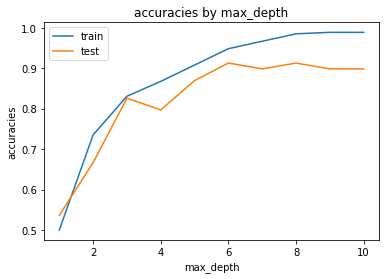

In [39]:
# import la bibliothèque:
import matplotlib.pyplot as plt

max_depth = range(1, 11)
plt.plot(max_depth,list_of_accuracies_train, label="train")
plt.plot(max_depth,list_of_accuracies_test, label="test")
plt.legend()
plt.title('accuracies by max_depth')
plt.ylabel('accuracies')
plt.xlabel('max_depth')
plt.show()

KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)

In [46]:
# Normaliser les valeurs pour le KNN
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Train du KNN
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [49]:
def auto_score(model, x_train, x_test):
    X_train = x_train
    X_test = x_test
    # Training
    model.fit(X_train, y_train)

    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Score
    print("score de précision (accuracy) sur l'ensemble d'entraînement :",model.score(X_train, y_train))
    print("score de précision (accuracy) sur l'ensemble de test :",model.score(X_test, y_test),"\n")
    
    #NB: [0, 1, 2, 3, 4]=['bad', 'good', 'not good not bad', 'very bad', 'very good']
    print("Labels \t['bad', 'good', 'not good not bad', 'very bad', 'very good']")
    print("f1 score :", f1_score(y_true=y_train, y_pred=y_train_pred, 
                                 labels=['bad', 'good', 'not good not bad', 'very bad', 'very good'], 
                                 average=None), "\n")
    print("Labels    \t['bad', 'good', 'not good not bad', 'very bad', 'very good']")
    print("precision score :", precision_score(y_true=y_train, y_pred=y_train_pred, 
                                               labels=['bad', 'good', 'not good not bad', 'very bad', 'very good'], 
                                               average=None), "\n")
    print("Labels    \t['bad', 'good', 'not good not bad', 'very bad', 'very good']")
    print("recall score :", recall_score(y_true=y_train, y_pred=y_train_pred, 
                                            labels=['bad', 'good', 'not good not bad', 'very bad', 'very good'], 
                                            average=None), "\n")
    conf_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
    conf_train = pd.DataFrame(conf_train,
                            index=modelLR.classes_ + ": reel",
                            columns=modelLR.classes_ + ": pred")
    print("Confusion matrix train: \n", conf_train)
    conf_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    conf_test = pd.DataFrame(conf_test,
                            index=model.classes_ + ": reel",
                            columns=model.classes_ + ": pred")
    print("Confusion matrix test: \n", conf_test)
    return model.score(X_test, y_test)

In [53]:
# Tester le KNN
auto_score(modelKNN, X_train, X_test)

# ERROR: dtype est int; Pour bebbuguer l'erreur, il faut faire l'opération inverse du factorize! 
# car ici: [0, 1, 2, 3, 4]=['bad', 'good', 'not good not bad', 'very bad', 'very good']

score de précision (accuracy) sur l'ensemble d'entraînement : 0.8308823529411765
score de précision (accuracy) sur l'ensemble de test : 0.7246376811594203 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0. 0. 0. 0. 0.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0. 0. 0. 0. 0.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0. 0. 0. 0. 0.] 



/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

UFuncTypeError: ignored

In [51]:
# Boucle pour trouver le meilleur nombre de voisins
accuracyKnn = []
k_range = range(1,11)
for i in k_range:
    print(f"For {i} neighbors")
    accuracyKnn.append(auto_score(KNeighborsClassifier(n_neighbors=i), X_train, X_test))
    
# ERROR: dtype est int; Pour bebbuguer l'erreur, il faut faire l'opération inverse du factorize! 
# car ici: [0, 1, 2, 3, 4]=['bad', 'good', 'not good not bad', 'very bad', 'very good']

For 1 neighbors
score de précision (accuracy) sur l'ensemble d'entraînement : 1.0
score de précision (accuracy) sur l'ensemble de test : 0.7101449275362319 

Labels 	['bad', 'good', 'not good not bad', 'very bad', 'very good']
f1 score : [0. 0. 0. 0. 0.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
precision score : [0. 0. 0. 0. 0.] 

Labels    	['bad', 'good', 'not good not bad', 'very bad', 'very good']
recall score : [0. 0. 0. 0. 0.] 



/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

UFuncTypeError: ignored